In [49]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'darkgrid')

In [50]:
course_information = pd.read_csv("/content/course_information.csv")
course_posts = pd.read_csv("/content/course_posts.csv")
course_threads = pd.read_csv("/content/course_threads.csv")

In [51]:
course_information.shape, course_posts.shape, course_threads.shape

((60, 11), (739074, 12), (99629, 11))

# Figure 1

In [52]:
#checking for the missing values
course_information.isnull().sum()

name                0
course_id           0
weeks               0
hours               0
start_date          0
end_date           57
type                0
language            0
num_threads         0
mandatory_posts    56
num_users           0
dtype: int64

In [53]:
#creating a new dataset with values sorted in a descending order
course_info_sorted =course_information.copy()
course_info_sorted.sort_values(by='num_threads', ascending= False,inplace= True)

Text(0.5, 1.0, 'Number of threads Vs. Course Identifiers')

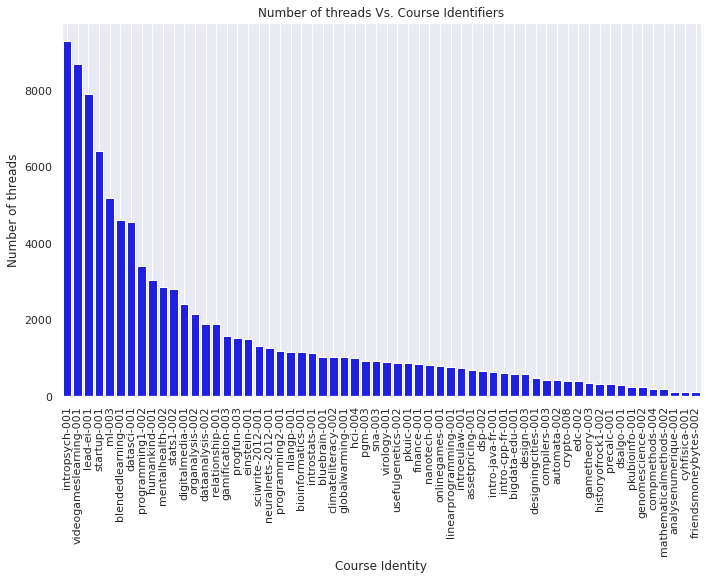

In [54]:
#generating plot usinig seaborn
plt.figure(figsize=(10,8))
sns.barplot(data = course_info_sorted, x ='course_id', y = 'num_threads', color='blue');
plt.xticks(rotation = 90, horizontalalignment = 'center');

plt.xlabel("Course Identity")
plt.ylabel("Number of threads")
plt.grid()
plt.tight_layout();
plt.title("Number of threads Vs. Course Identifiers")

# Figure 3

CPU times: user 80.5 ms, sys: 916 µs, total: 81.4 ms
Wall time: 81.8 ms


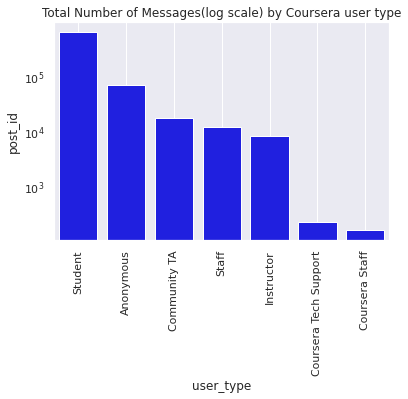

In [55]:
%%time
#using gorupby to make another dataframe with user_type and post id
course_posts_1 = course_posts.groupby('user_type')['post_id'].count().reset_index()

#converting it into a dataframe
##course_posts_1 = pd.DataFrame(data = course_posts_1)

#arranging the data into descending order and using inplace = True to make changes to the dataframe
course_posts_1.sort_values('post_id', ascending = False, inplace= True)

#using seaborn to plot 
sns.barplot(data = course_posts_1, x = 'user_type', y = 'post_id', color = 'blue')
plt.yscale('log');
plt.xticks(rotation = 90, horizontalalignment = "center");
plt.title("Total Number of Messages(log scale) by Coursera user type")
plt.grid()

# Figure 4

In [56]:
course_posts.head(2)

,post_id,thread_id,course_id,parent_id,order,user_id,user_type,post_time,relative_t,votes,num_words,forum_id
0,3,2,analysenumerique-001,0,1,0,Anonymous,1358942448,-0.404753,2,23,13
1,4,2,analysenumerique-001,0,2,3992067770,Instructor,1359109877,-0.373994,0,15,13


In [57]:
#Generating a column where post_id = 0

course_posts['is_post'] = course_posts.parent_id==0

#using groupby.count function to group the variables 

tmp = course_posts.groupby(['course_id', 'thread_id', 'is_post']).count()[['post_id']].reset_index()

# renaming the varibale 'post_id as count

tmp['count'] = tmp['post_id']
tmp.drop('post_id', axis=1, inplace=True)
tmp.head()

,course_id,thread_id,is_post,count
0,analysenumerique-001,2,False,2
1,analysenumerique-001,2,True,9
2,analysenumerique-001,3,False,3
3,analysenumerique-001,3,True,16
4,analysenumerique-001,4,True,2


In [58]:
#generating a new column with the name num_posts and assigning it value as 0

tmp['num_posts'] = 0

#checking if it's a post if yes replacing it with the value from count

tmp.loc[tmp.is_post == True, 'num_posts'] = tmp['count']
tmp.head()

,course_id,thread_id,is_post,count,num_posts
0,analysenumerique-001,2,False,2,0
1,analysenumerique-001,2,True,9,9
2,analysenumerique-001,3,False,3,0
3,analysenumerique-001,3,True,16,16
4,analysenumerique-001,4,True,2,2


In [59]:
#if the condition is false inserting values form count to num_comments

tmp['num_comments'] = 0

tmp.loc[tmp.is_post==False, 'num_comments'] = tmp['count']
tmp.head()

,course_id,thread_id,is_post,count,num_posts,num_comments
0,analysenumerique-001,2,False,2,0,2
1,analysenumerique-001,2,True,9,9,0
2,analysenumerique-001,3,False,3,0,3
3,analysenumerique-001,3,True,16,16,0
4,analysenumerique-001,4,True,2,2,0


In [60]:
#using groupby.max and resetting the index

tmp = tmp.groupby(['course_id', 'thread_id']).max().reset_index()

tmp.head()

,course_id,thread_id,is_post,count,num_posts,num_comments
0,analysenumerique-001,2,True,9,9,2
1,analysenumerique-001,3,True,16,16,3
2,analysenumerique-001,4,True,2,2,0
3,analysenumerique-001,7,True,3,3,0
4,analysenumerique-001,8,True,8,8,1


In [61]:
#creating a new dataset with values with forum id 4 and 3 and mering it with tmp dataset on course_id and thread_id

fig4_dat = course_threads.query("forum_id == 4|forum_id==3").merge(tmp, on=['course_id', 'thread_id'])
fig4_dat.head(2)

,thread_id,course_id,og_forum,og_forum_id,parent_forum,parent_forum_id,forum_chain,depth,num_views,num_tags,forum_id,is_post,count,num_posts,num_comments
0,5,assetpricing-001,Quizzes and Homeworks,3,Forums,0.0,Forums/ Quizzes and Homeworks,2,242,0,3,True,5,5,0
1,6,assetpricing-001,Quizzes and Homeworks,3,Forums,0.0,Forums/ Quizzes and Homeworks,2,122,0,3,True,4,4,0


In [62]:
#removing unwanted variables for plotting figure 4

fig4_dat = fig4_dat[['forum_id', 'num_posts', 'num_comments']]
fig4_dat.head(2)

,forum_id,num_posts,num_comments
0,3,5,0
1,3,4,0


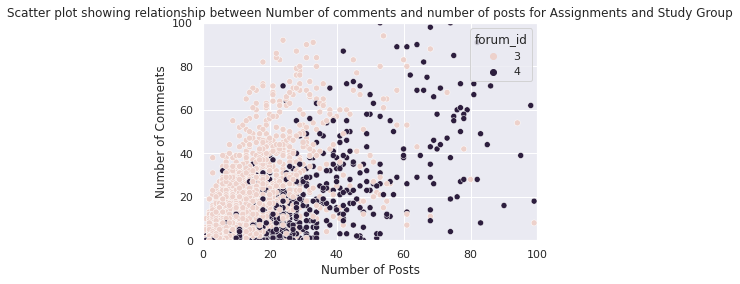

In [63]:
sns.scatterplot(data=fig4_dat, x='num_posts', y='num_comments', hue='forum_id')

#setting limits for x and y axis

plt.xlim(0,100)
plt.ylim(0,100)

#setting labels and the title
plt.xlabel("Number of Posts")
plt.ylabel("Number of Comments")
plt.title("Scatter plot showing relationship between Number of comments and number of posts for Assignments and Study Group");


# Figure 2

In [64]:
tmp.head()

,course_id,thread_id,is_post,count,num_posts,num_comments
0,analysenumerique-001,2,True,9,9,2
1,analysenumerique-001,3,True,16,16,3
2,analysenumerique-001,4,True,2,2,0
3,analysenumerique-001,7,True,3,3,0
4,analysenumerique-001,8,True,8,8,1


In [72]:
df = pd.merge( tmp, course_information, on = 'course_id')
df.head(2)

,course_id,thread_id,is_post,count,num_posts,num_comments,name,weeks,hours,start_date,end_date,type,language,num_threads,mandatory_posts,num_users
0,analysenumerique-001,2,True,9,9,2,Analyse Numérique pour Ingénieurs,9,5,2/18/2013,NaN,Q,FR,119,NaN,103
1,analysenumerique-001,3,True,16,16,3,Analyse Numérique pour Ingénieurs,9,5,2/18/2013,NaN,Q,FR,119,NaN,103


In [73]:
#removing extra variables to generate Figure 2
df = df[['course_id','thread_id', 'count', 'num_posts', 'num_comments','num_users','num_threads', 'weeks']]
df.head(2)

,course_id,thread_id,count,num_posts,num_comments,num_users,num_threads,weeks
0,analysenumerique-001,2,9,9,2,103,119,9
1,analysenumerique-001,3,16,16,3,103,119,9


Text(0, 0.5, 'number of threads')

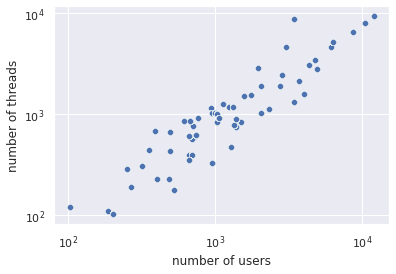

In [76]:
#generating plots
sns.scatterplot(x = df.num_users, y = df.num_threads)

plt.xscale('log')
plt.yscale('log')
plt.xlabel("number of users")
plt.ylabel('number of threads')

# Figure 5

In [77]:
course_information.head(2)

,name,course_id,weeks,hours,start_date,end_date,type,language,num_threads,mandatory_posts,num_users
0,Analyse Numérique pour Ingénieurs,analysenumerique-001,9,5,2/18/2013,NaN,Q,FR,119,NaN,103
1,Asset Pricing,assetpricing-001,9,12.5,9/30/2013,NaN,Q,E,673,NaN,392


In [78]:
# creating a new column which tells if the course is Quantitative or not
course_information['Quantitative_courses'] = course_information['type'] == 'Q'

#creating a new df TeMp from course_post
TeMp = course_posts.groupby(['post_id','course_id']).count().reset_index()

#keeping selecteive columns
TeMp = TeMp[['course_id', 'post_id']]

# renaming the column
TeMp['num_of_messages'] = TeMp['post_id']
TeMp.drop('post_id',axis = 1, inplace = True)
TeMp.head()

,course_id,num_of_messages
0,assetpricing-001,1
1,automata-002,1
2,bigdata-edu-001,1
3,bioinformatics-001,1
4,blendedlearning-001,1


In [79]:
#Creating a new df using TeMp and Course_information

course_information_with_messages =  pd.merge(TeMp, course_information, on = 'course_id')

#removing extra columns
course_information_with_messages.drop(['name', 'hours', 'start_date', 'end_date', 'language','mandatory_posts'],
                                      axis = 1, inplace = True)

course_information_with_messages.head(2)

,course_id,num_of_messages,weeks,type,num_threads,num_users,Quantitative_courses
0,assetpricing-001,1,9,Q,673,392,True
1,assetpricing-001,2,9,Q,673,392,True


In [80]:
#Creating extra columns which we will later use to add values to if they are Quantitative courses

course_information_with_messages['Quant_messages'] = 0
course_information_with_messages['Quant_course_duration'] = 0
course_information_with_messages.head(2)

,course_id,num_of_messages,weeks,type,num_threads,num_users,Quantitative_courses,Quant_messages,Quant_course_duration
0,assetpricing-001,1,9,Q,673,392,True,0,0
1,assetpricing-001,2,9,Q,673,392,True,0,0


In [81]:
#Adding number of messages to the Quant_messages column if the course is Quantitative
course_information_with_messages.loc[course_information_with_messages.Quantitative_courses == True
                                     , 'Quant_messages'] = course_information_with_messages['num_of_messages']

In [82]:
##Adding course_duration to the Quant_messages column if the course is Quantitative
course_information_with_messages.loc[course_information_with_messages.Quantitative_courses == True
                                     , 'Quant_course_duration'] = course_information_with_messages['weeks']

In [83]:
#dropping extra columns
course_information_with_messages.head(2)
course_information_with_messages.drop(['type','Quantitative_courses'], axis =1 , inplace = True)

In [86]:
course_information_with_messages.head(2)

,course_id,num_of_messages,weeks,num_threads,num_users,Quant_messages,Quant_course_duration,normalized_course_duration
0,assetpricing-001,1,9,673,392,1,9,5.990532
1,assetpricing-001,2,9,673,392,2,9,5.990532


In [87]:
#making a column with normalized course duration
course_information_with_messages['normalized_course_duration'] = course_information_with_messages.weeks - course_information_with_messages.weeks.mean() / course_information_with_messages.weeks.std()

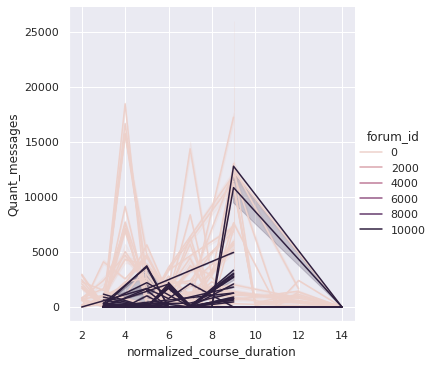

In [94]:
#generating a plot
sns.relplot(x = course_information_with_messages.normalized_course_duration, y = course_information_with_messages.Quant_messages, kind = 'line', hue= course_posts.forum_id)